In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import re
import glob
import os
### code based on https://www.kaggle.com/code/adamlouly/exploratory-data-analysis-on-wisdm
%matplotlib inline

In [3]:
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

plt.rcParams["figure.figsize"] = (20,10)

data_folder_path = "test_run/original_datasets/hhar/Activity recognition exp"

In [12]:
har_phone_acc = pd.read_csv(os.path.join(data_folder_path, 'Phones_accelerometer.csv'))
har_phone_gyro = pd.read_csv(os.path.join(data_folder_path, 'Phones_gyroscope.csv'))
har_watch_acc = pd.read_csv(os.path.join(data_folder_path, 'Watch_accelerometer.csv'))
har_watch_gyro = pd.read_csv(os.path.join(data_folder_path, 'Watch_gyroscope.csv'))
acc_data = pd.concat([har_phone_acc, har_watch_acc])
gyro_data = pd.concat([har_phone_gyro, har_watch_gyro])

acc_data.dropna(how="any", inplace=True)
acc_data = acc_data[['x', 'y', 'z', "gt", "User", "Device"]]
acc_data.columns = ["x-axis", "y-axis", "z-axis", "activity", "user-id", "device"]
gyro_data.dropna(how="any", inplace=True)
gyro_data = gyro_data[['x', 'y', 'z', "gt", "User", "Device"]]
gyro_data.columns = ["x-axis", "y-axis", "z-axis", "activity", "user-id", "device"]
all_data = pd.concat([acc_data, gyro_data])


In [5]:
acc_data.head()

,x-axis,y-axis,z-axis,activity,user-id,device
0,-5.958191,0.688065,8.135345,stand,a,Phone acc
1,-5.952240,0.670212,8.136536,stand,a,Phone acc
2,-5.995087,0.653549,8.204376,stand,a,Phone acc
3,-5.942718,0.676163,8.128204,stand,a,Phone acc
4,-5.991516,0.641647,8.135345,stand,a,Phone acc


In [6]:
acc_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14299880 entries, 0 to 3540961
Data columns (total 6 columns):
 #   Column    Dtype  
---  ------    -----  
 0   x-axis    float64
 1   y-axis    float64
 2   z-axis    float64
 3   activity  object 
 4   user-id   object 
 5   device    object 
dtypes: float64(3), object(3)
memory usage: 763.7+ MB


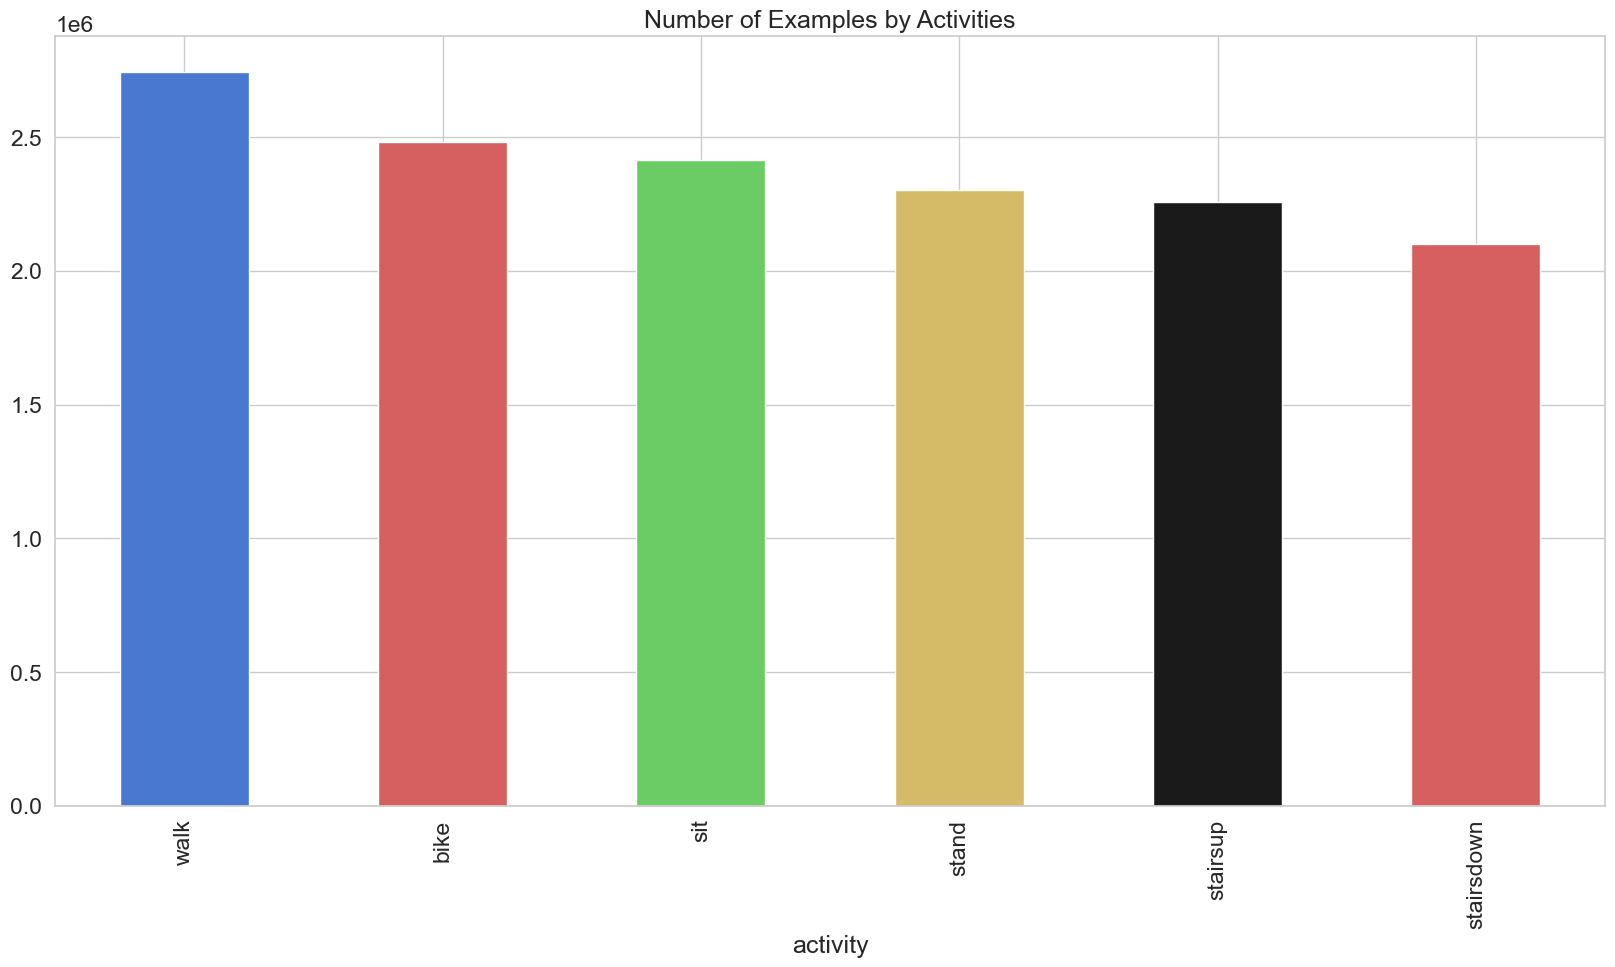

In [7]:
acc_data['activity'].value_counts().plot(kind='bar', title='Number of Examples by Activities',color=['b','r','g','y','k','r']);

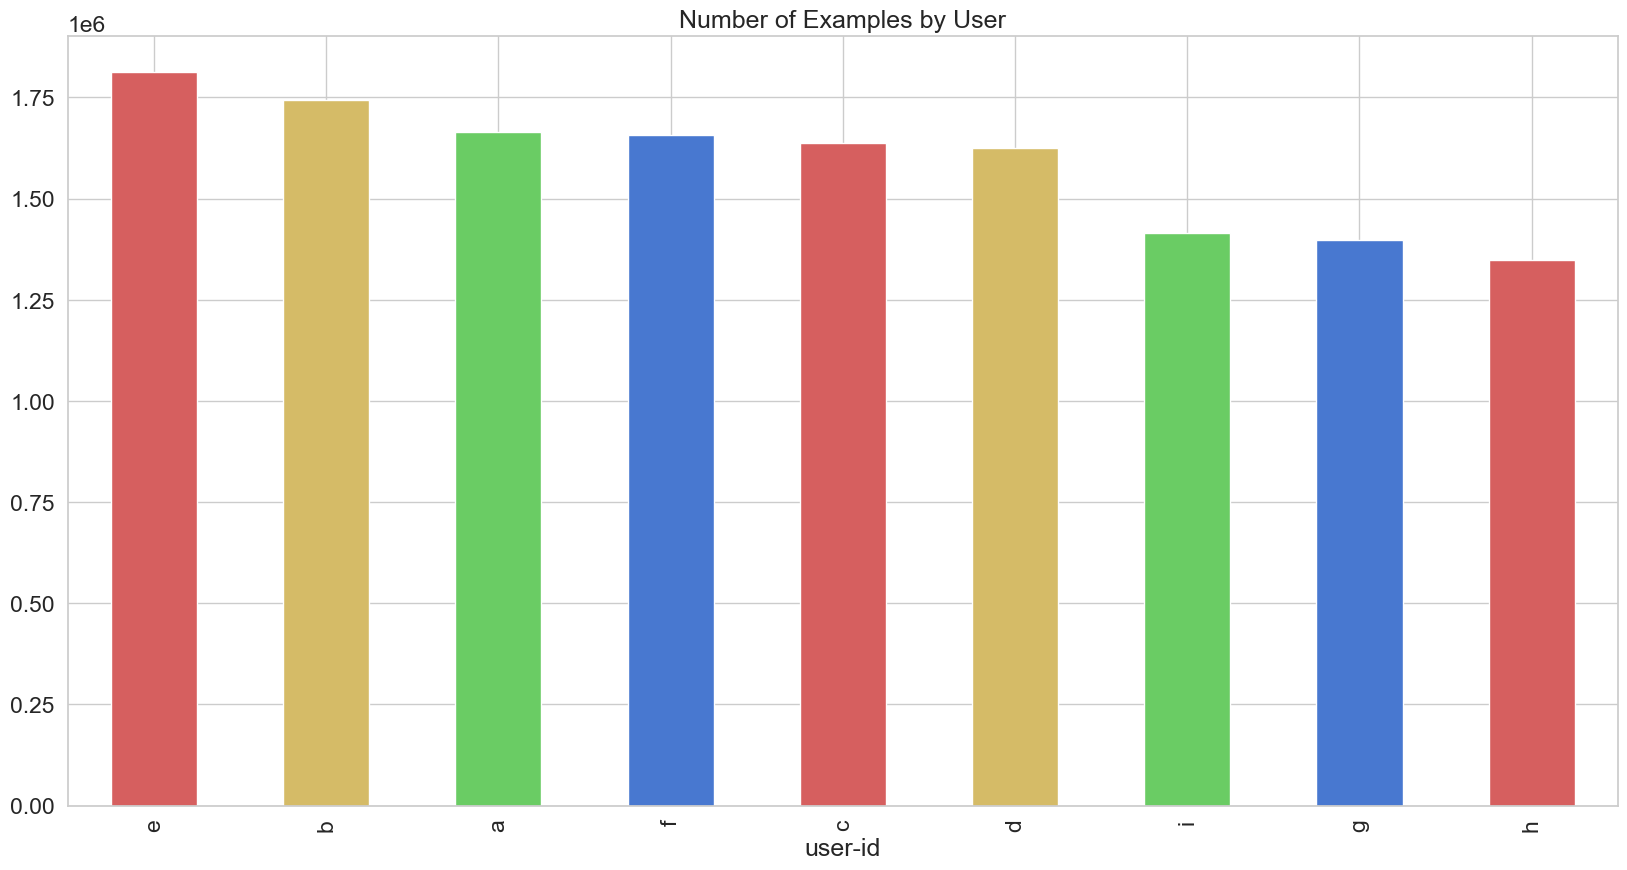

In [9]:
acc_data['user-id'].value_counts().plot(kind='bar', title='Number of Examples by User',color=['r','y','g','b']);


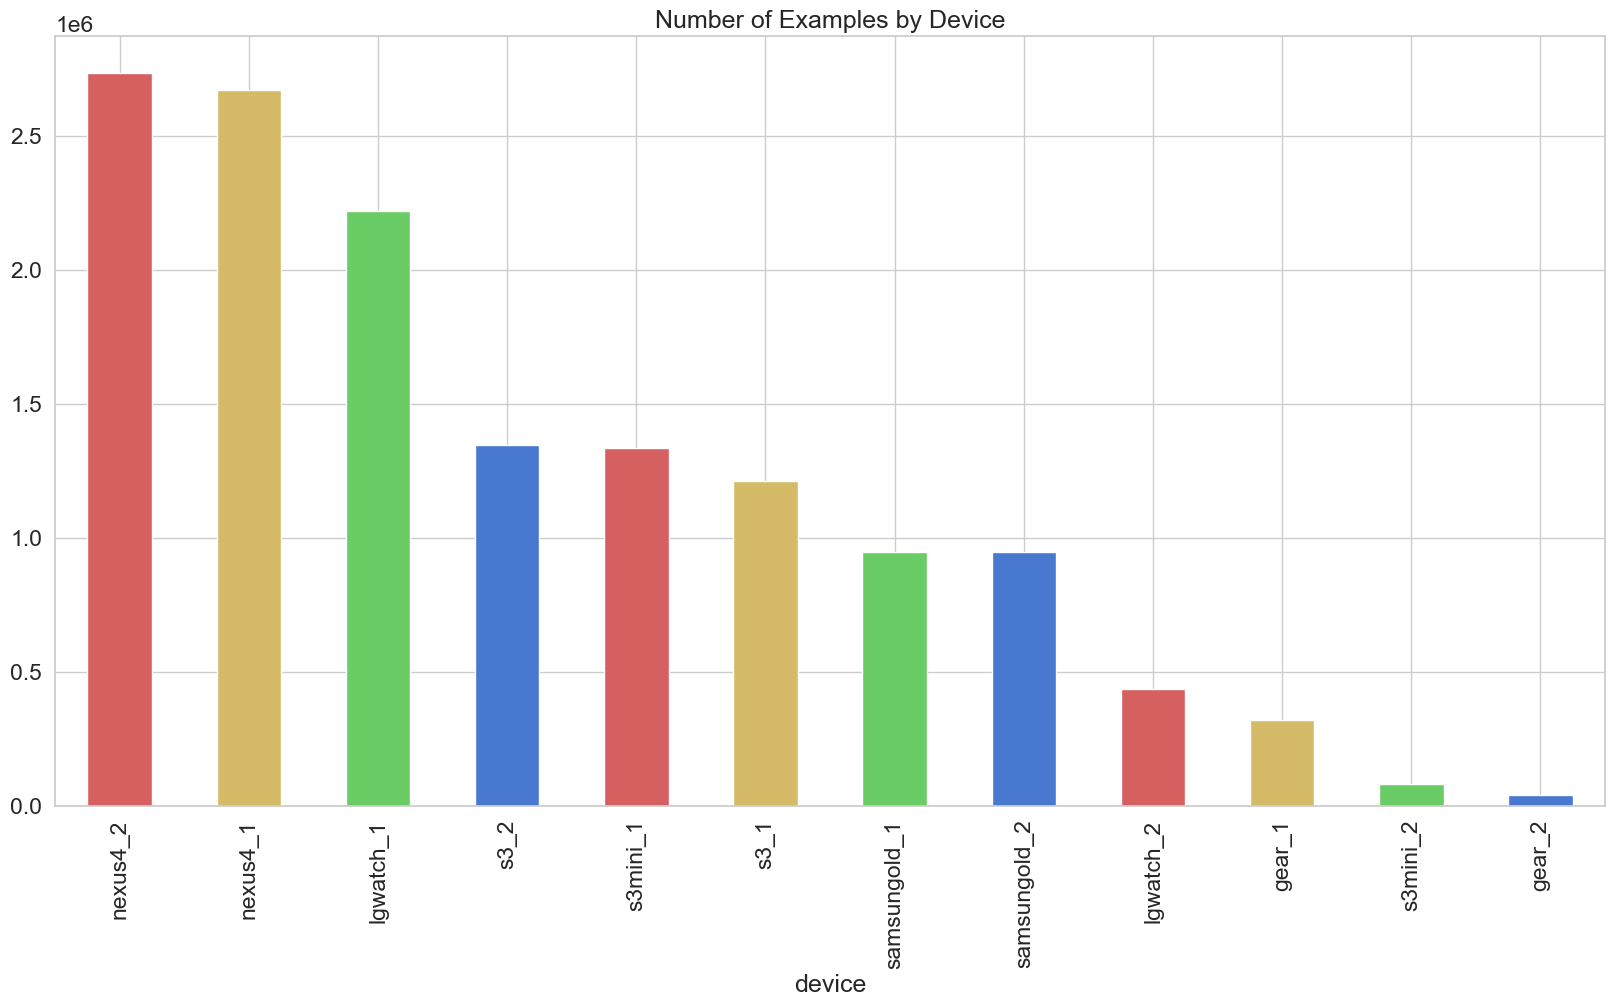

In [13]:
acc_data['device'].value_counts().plot(kind='bar', title='Number of Examples by Device',color=['r','y','g','b']);
